In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./dataset.csv")

In [3]:
import numpy as np
from random import randrange
import re

In [4]:
columns = df.columns
target = 'label'
X = df[[column for column in columns if column != target]].to_numpy()
y = df[target].to_numpy()

In [5]:
def random_split(X, y, size=0.3):
    X_test, y_test = [], []
    
    sample_size = round(size * len(X))
    for _ in range(sample_size):
        rand_index = randrange(len(X))
        X_test.append(X[rand_index])
        y_test.append(y[rand_index])
        X = np.delete(X, [rand_index], 0)
        y = np.delete(y, rand_index)
    
    return X, y, X_test, y_test

In [6]:
def get_words(email):
    words = []

    email = re.sub(r'[^\w]', ' ', str(email))
    normalized = [word.lower() for word in email.split()]
    words.extend(normalized)
    
    return set(words)

In [7]:
def vocabulary(dataset, classes):
    words = []

    remove = []
    for i, email in enumerate(dataset):
        try:
            words.extend(get_words(email))
        except:
            remove.append(i)

    classes = [i for i in classes if not i in remove]

    return set(words)

In [8]:
def transform(email, vocab):
    
    transformed = np.array([0] * len(vocab))
    normalized = get_words(email)
    
    for i, word in enumerate(vocab):
        if word in normalized:
            transformed[i] = 1
            
    return transformed

In [9]:
def fit(X_train, y_train, vocab):

    spam, ham = np.array([0] * len(vocab)), np.array([0] * len(vocab))
    
    for i, email in enumerate(X_train):
        if y[i] == 1:
            spam += transform(email, vocab)
        else:
            ham += transform(email, vocab)
            
    return spam, ham

In [10]:
def test(X_train, y_train, X_test, y_test, spam, ham, vocab):
    
    total_spam = sum(y_test)
    total_ham = len(y_test) - total_spam

    total_words = len(vocab)
    spam_score, ham_score = 0, 0
    predicted = []
    for email in X_test:
        spam_score = ham_score = 0
    
        transformed = transform(email, vocab)
        for i in range(len(transformed)):
            if transformed[i] == 0: continue
                
            sp = spam[i] / (total_spam + total_words)
            hp = ham[i] / (total_ham + total_words)
            
            spam_score += sp
            ham_score += hp

        is_spam = 1 if spam_score > ham_score else 0
        predicted.append(is_spam)
        
    return predicted

In [11]:
X_train, y_train, X_test, y_test = random_split(X.copy(), y.copy())
vocab = vocabulary(X_train, y_train)

In [12]:
spam, ham = fit(X_train, y_train, vocab)

In [13]:
predicted = test(X_train, y_train, X_test, y_test, spam, ham, vocab)

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [15]:
fpr, tpr, thresh = roc_curve(y_test, predicted, pos_label=1)
auc_score = roc_auc_score(y_test, predicted)

In [16]:
print(f"Accuracy: {auc_score}")

Accuracy: 0.5


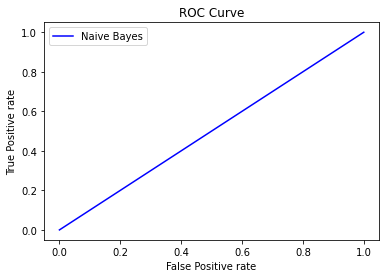

In [17]:
plt.plot(fpr, tpr, color="blue", label="Naive Bayes")
plt.title("ROC Curve")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend(loc='best')
plt.show()